# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.374615e+01     1.580035e+01
 * time: 0.0029358863830566406
     1     6.316633e+01     9.758059e+00
 * time: 0.008832931518554688
     2     5.808726e+01     1.466283e+01
 * time: 0.021277904510498047
     3     4.111564e+01     1.036670e+01
 * time: 0.11644291877746582
     4     3.005494e+01     8.279362e+00
 * time: 0.13399600982666016
     5     2.004588e+01     5.369738e+00
 * time: 0.14902997016906738
     6     1.345679e+01     4.353693e+00
 * time: 0.1619548797607422
     7     1.102563e+01     6.815088e+00
 * time: 0.1720597743988037
     8     9.117190e+00     3.223495e+00
 * time: 0.1849348545074463
     9     8.066823e+00     2.669837e+00
 * time: 0.1976318359375
    10     7.941633e+00     4.887231e+00
 * time: 0.20771098136901855
    11     7.122505e+00     2.866922e+00
 * time: 0.21819186210632324
    12     6.653308e+00     2.478619e+00
 * time: 0.2287299633026123
    13     6.361505e+00     2.269875e+00
 * time: 0.2

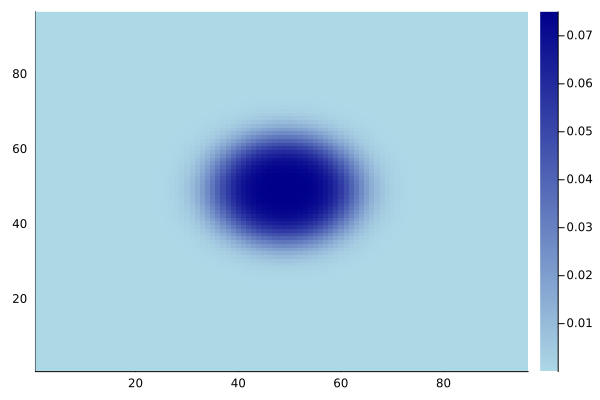

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)